In [1]:
import cv2
import os
import numpy as np

# Folder containing extracted images
folder_path = folder_path = os.path.join(os.getcwd(), "../Resources/Dental_Images/Dental_Images/")


def calculate_clarity(image):
    try:  #convert to gray scale and apply laplacian operator to detect the edges
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
        return laplacian_var
    except Exception as e:
        print(f"Error calculating clarity: {e}")
        return 0  

def scan_images(folder_path):
    results = []
    for filename in os.listdir(folder_path):
        print(filename) # printing filename
        
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                # print(f"Failed to Load the Images in : {image_path}")
                clarity = calculate_clarity(image)
                height, width,_= image.shape
                results.append({
                    'filename': filename,
                    'clarity': clarity,
                    'resolution': (width, height),
                    'path': image_path
                })
    return results


# Print results
image_results = scan_images(folder_path)
i = 1
for result in image_results:
    print(f"Sl.No {i}, Image: {result['filename']}, Clarity: {result['clarity']:.2f}, Resolution: {result['resolution']}")
    i=i+1

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sravanireddypatlolla/Documents/GitHub/Capstone-Project/milestone2/../Resources/Dental_Images/Dental_Images/'

In [2]:
import numpy as np
# extract the clarity values from the results
clarity_values=[]
for img in image_results:
    clarity_values.append(img['clarity'])
    
min_clarity = np.min(clarity_values)
max_clarity = np.max(clarity_values)
med_clarity = np.median(clarity_values)

print(f"Minimum Clarity: {min_clarity:.2f}")
print(f"Maximum Clarity: {max_clarity:.2f}")
print(f"Median Clarity: {med_clarity:.2f}")



NameError: name 'image_results' is not defined

In [3]:
import matplotlib.pyplot as plt

blurry = []
slightly_blurry = []
acceptable_sharpness = []
very_sharp = []

for img in clarity_values:
    if img < 50:
        blurry.append(img)
    elif 50 <= img < 100:
        slightly_blurry.append(img)
    elif 100 <= img < 150:
        acceptable_sharpness.append(img)
    else:
        very_sharp.append(img)
    
    
categories = ["Blurry", "Slightly Blurry", "Acceptable Sharpness", "Very Sharp"]
counts = [len(blurry), len(slightly_blurry), len(acceptable_sharpness), len(very_sharp)]

        
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=colors)
# plt.bar(color=['red', 'orange', 'blue', 'green'])
plt.xlabel("Image Clarity Categories")
plt.ylabel("Number of Images")
plt.title("Distribution of Image Clarity")
plt.show()

NameError: name 'colors' is not defined

<Figure size 800x600 with 0 Axes>

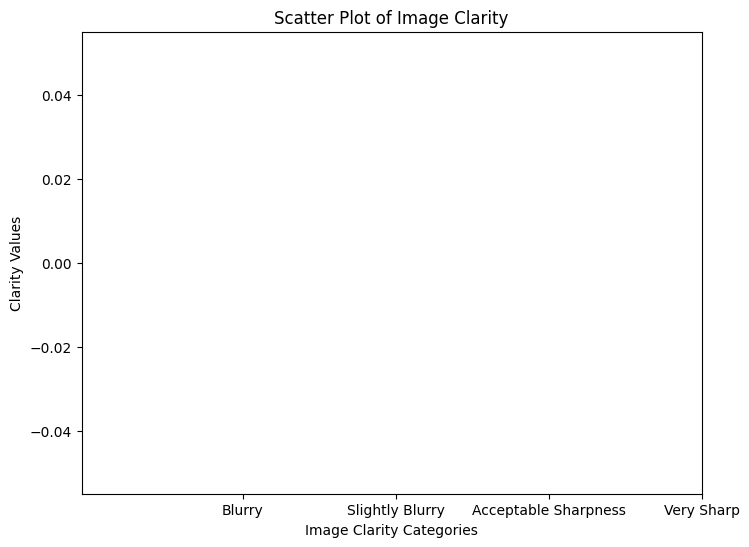

In [4]:
plt.figure(figsize=(8, 6))
x_values = [1] * len(blurry) + [2] * len(slightly_blurry) + [3] * len(acceptable_sharpness) + [4] * len(very_sharp)
y_values = blurry + slightly_blurry + acceptable_sharpness + very_sharp

# Create the scatter plot
plt.scatter(x_values, y_values)

# Add labels and a title
plt.xticks([1, 2, 3, 4], ['Blurry', 'Slightly Blurry', 'Acceptable Sharpness', 'Very Sharp'])
plt.xlabel("Image Clarity Categories")
plt.ylabel("Clarity Values")
plt.title("Scatter Plot of Image Clarity")

# Show the plot
plt.show()

In [5]:
import os
# Craeting the train, validation and test folders

folder_path =  os.path.join(os.getcwd(), "../Resources/Dental_Images/Dental_Images/") 
train_image_path = os.path.join(os.getcwd(), "../Resources/train_images/")  
validation_images_path= os.path.join(os.getcwd(), "../Resources/validation_images/")     
test_images_path = os.path.join(os.getcwd(), "../Resources/test_images/") 

os.makedirs (train_image_path, exist_ok = True)
os.makedirs (validation_images_path, exist_ok = True)
os.makedirs (test_images_path, exist_ok = True)


num_images = len(folder_path)
train_num = int(0.7 * num_images)  
val_num = int(0.2 * num_images)    
test_num = num_images - train_num - val_num  

images = os.listdir(folder_path)
images.sort()
# Split the images into train, validation, and test sets
train_images = images[:train_num]
validation_images = images[train_num:train_num + val_num]
sum = train_num+val_num
test_images = images[sum:]

for image in validation_images:
    image_str = str(image)  # Ensure image is a string
    source = folder_path+image_str
    print(source)
    #validation_images_str=str(validation_images)
    destination = validation_images_path+"/"+ image_str
    #print(destination)
    os.rename(source, destination)

for image in train_images:
    image_str = str(image)  # Ensure image is a string
    source = folder_path+image_str
    destination = train_image_path + image_str
    os.rename(source, destination)
    
for image in test_images:
    image_str = str(image)  # Ensure image is a string
    source = folder_path+image_str
    destination = test_images_path + image_str
    #print(destination)
    os.rename(source, destination)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sravanireddypatlolla/Documents/GitHub/Capstone-Project/milestone2/../Resources/Dental_Images/Dental_Images/'

In [6]:
import os
annotaion_path = "../milestone2/stratified_sampling/output_images/train/"
os.makedirs(annotaion_path, exist_ok=True)

labeling_path = "..//milestone2/stratified_sampling/output_images/labelling"
os.makedirs(labeling_path, exist_ok=True)

In [6]:
# pip install labelImg

import os
import subprocess

image_folder = "../milestone2/stratified_sampling/output_images/train/"
annotaion_folder = "../milestone2/stratified_sampling/output_images/train/"

os.makedirs(annotaion_folder, exist_ok=True)
subprocess.run(["labelImg", image_folder])


SyntaxError: invalid syntax (1521218647.py, line 1)